# Get the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Task 6/housing.csv')

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

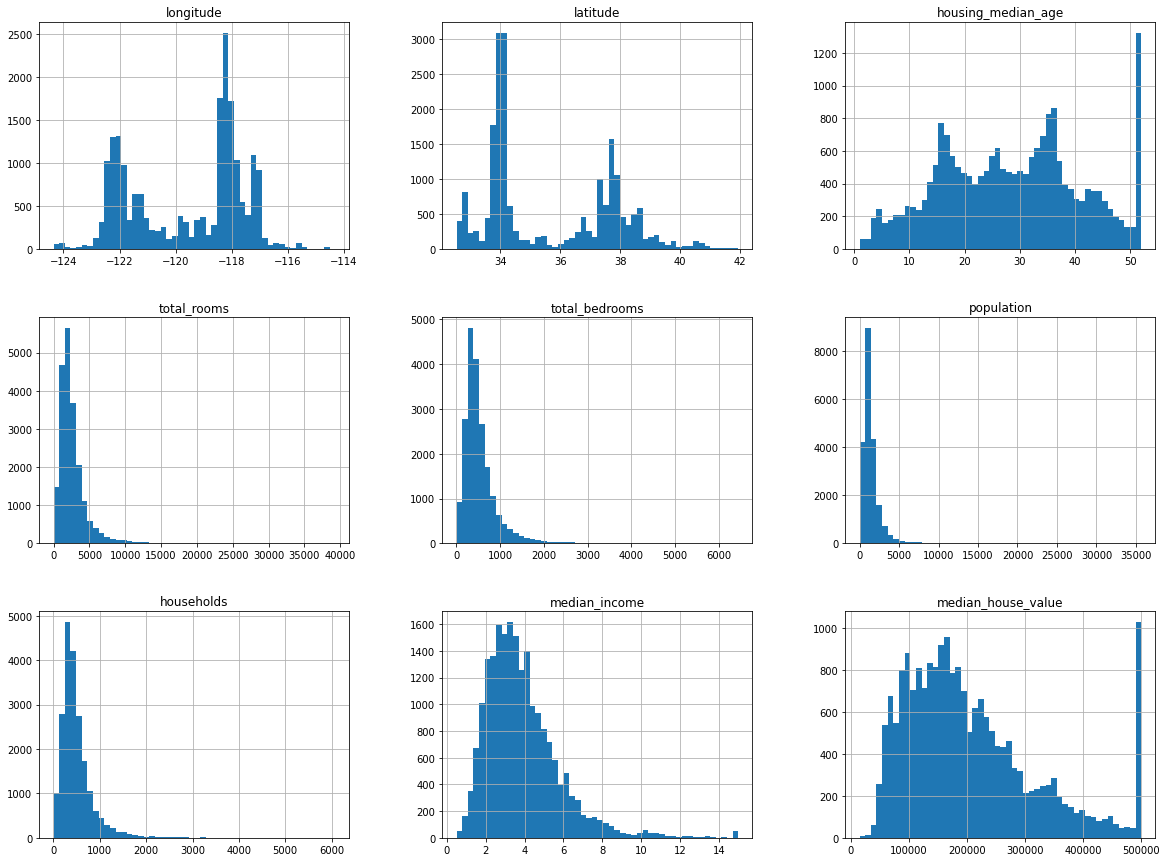

In [10]:
df.hist(figsize = (20,15),bins = 50)
plt.show()

# Create a Test Set

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 42)

In [12]:
train_set.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

Text(0.5, 1.0, 'Income vs House Value')

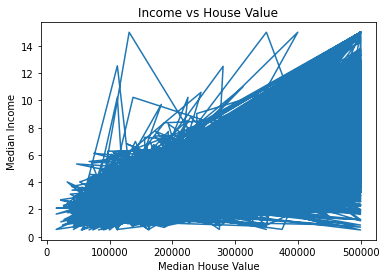

In [13]:
plt.plot(train_set['median_house_value'],train_set['median_income'])
plt.xlabel("Median House Value")
plt.ylabel("Median Income")
plt.title("Income vs House Value")

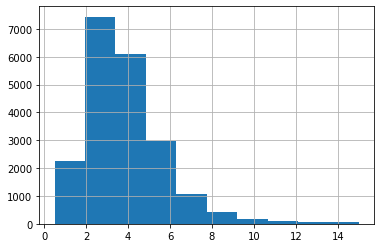

In [14]:
df["median_income"].hist()

# Visualizing the Data

In [15]:
housing = train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


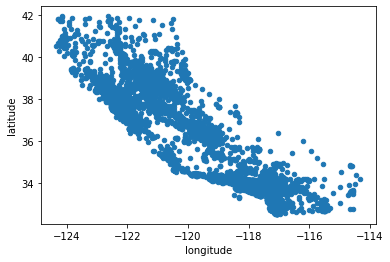

In [16]:
housing.plot(kind = 'scatter',x='longitude',y='latitude')

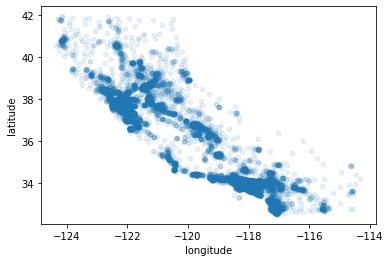

In [17]:
housing.plot(kind = 'scatter',x='longitude',y='latitude',alpha=0.1)

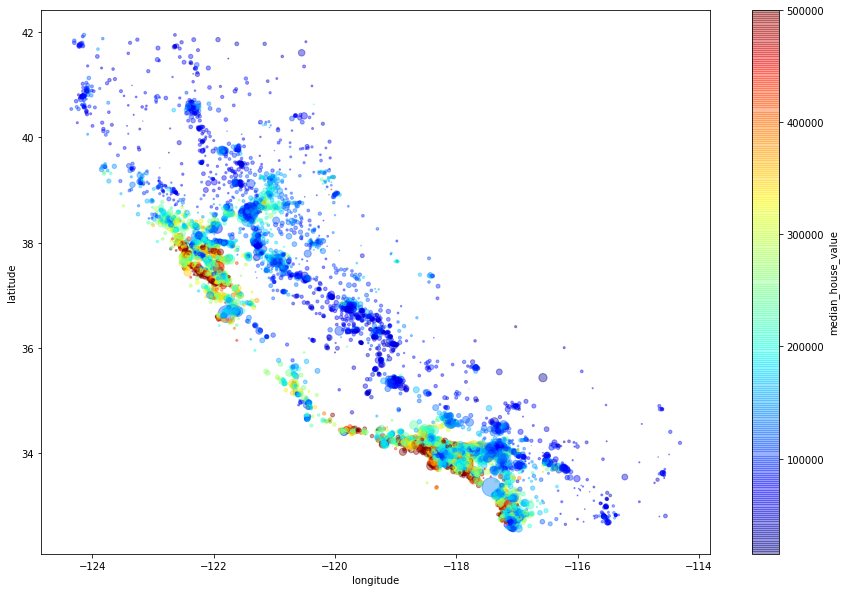

In [18]:
housing.plot(kind = 'scatter',x='longitude',y='latitude',alpha=0.4,
             s= housing['population']/100, c= 'median_house_value', 
             cmap = plt.get_cmap('jet'),colorbar = True, sharex = False,figsize = (15,10))

In [19]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdca456450>,
      dtype=object)

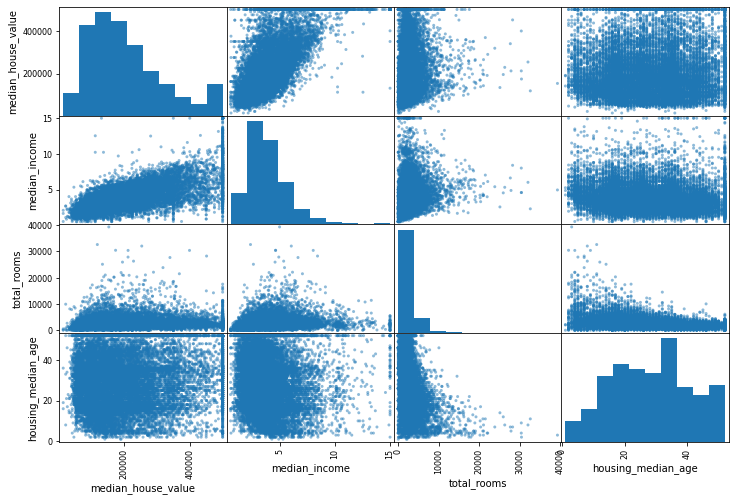

In [20]:
from pandas.plotting import scatter_matrix

atts = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[atts],figsize = (12,8))

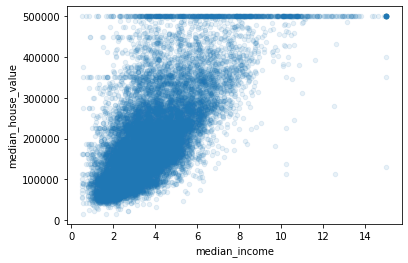

In [21]:
housing.plot(kind = 'scatter',x = 'median_income',y='median_house_value',alpha = 0.1)

In [22]:
housing['rooms_per_household'] = housing['total_bedrooms'] / housing['households']
housing['bedroom_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [23]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.690647
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
rooms_per_household        -0.051351
latitude                   -0.142983
bedroom_per_room           -0.257419
Name: median_house_value, dtype: float64

# Data Preparation

In [24]:
housing = train_set.drop('median_house_value',axis = 1)
housing_labels = train_set['median_house_value'].copy()

In [25]:
test_set.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [26]:
test_set.dropna(axis = 0, inplace = True)

In [27]:
housing_cat = housing[['ocean_proximity']]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe_housing = ohe.fit_transform(housing_cat)

In [28]:
ohe_housing.shape

(16512, 5)

In [29]:
ohe_housing.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [30]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [31]:
train_set_cat = train_set[['ocean_proximity']]
test_set_cat = test_set[['ocean_proximity']]

ohe_train = OneHotEncoder()
ohe_test = OneHotEncoder()
ohe_train_cat = ohe_train.fit_transform(train_set_cat)
ohe_test_cat = ohe_test.fit_transform(test_set_cat)

In [32]:
print(ohe_train_cat.shape)
print(ohe_test_cat.shape)

(16512, 5)
(3921, 5)


In [33]:
arr_ohe_train_cat = ohe_train_cat.toarray()
arr_ohe_test_cat = ohe_test_cat.toarray()

In [34]:
df_ohe_train_cat = pd.DataFrame(arr_ohe_train_cat)
df_ohe_test_cat = pd.DataFrame(arr_ohe_test_cat)

In [35]:
(df_ohe_train_cat.head())

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


In [36]:
(df_ohe_test_cat.head())

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [37]:
train_set.drop('ocean_proximity',axis = 1,inplace = True)
test_set.drop('ocean_proximity',axis = 1, inplace = True)

In [38]:
train_set.index = np.arange(0,16512)
test_set.index = np.arange(0,3921)

In [39]:
train_set_full = train_set.join(df_ohe_train_cat)
test_set_full = test_set.join(df_ohe_test_cat)

In [40]:
(train_set_full.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,0.0,0.0,0.0,0.0,1.0
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,0.0,0.0,0.0,0.0,1.0
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,0.0,0.0,0.0,0.0,1.0
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,0.0,0.0,0.0,0.0,1.0
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,0.0,1.0,0.0,0.0,0.0


In [41]:
(test_set_full.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,-120.67,37.37,18.0,164.0,30.0,104.0,32.0,1.6607,87500.0,0.0,1.0,0.0,0.0,0.0
1,-118.01,33.89,34.0,1653.0,292.0,1003.0,310.0,4.6000,203400.0,1.0,0.0,0.0,0.0,0.0
2,-121.97,36.97,15.0,2849.0,668.0,1546.0,582.0,2.7587,228600.0,0.0,0.0,0.0,0.0,1.0
3,-118.25,33.98,47.0,617.0,162.0,754.0,144.0,2.2969,116700.0,1.0,0.0,0.0,0.0,0.0
4,-121.81,37.38,29.0,570.0,76.0,244.0,72.0,12.3292,416700.0,1.0,0.0,0.0,0.0,0.0


In [42]:
train_set_full.drop(["median_house_value"],axis = 1, inplace = True)

# Training the Model

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_full.values,housing_labels)

LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(train_set_full.values)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68433.93736666226


In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(train_set_full.values,housing_labels)

DecisionTreeRegressor(random_state=42)

In [46]:
housing_predictions = tree_reg.predict(train_set_full.values)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Validation

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_set_full.values, housing_labels, scoring ="neg_mean_squared_error",cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
print("Scores: ", tree_rmse_scores)
print("Mean: ", tree_rmse_scores.mean())
print("Standard Deviation: ", tree_rmse_scores.std())

Scores:  [66901.80689562 69717.16806528 66772.74727375 70189.43109608
 67525.30971243 67528.03614663 62573.29539395 71201.14995545
 69987.59602774 68282.9174425 ]
Mean:  68067.94580094455
Standard Deviation:  2336.3097105092297


In [49]:
scores = cross_val_score(lin_reg, train_set_full.values, housing_labels, scoring ="neg_mean_squared_error",cv = 10)
lin_rmse_scores = np.sqrt(-scores)

In [50]:
print("Scores: ", lin_rmse_scores)
print("Mean: ", lin_rmse_scores.mean())
print("Standard Deviation: ", lin_rmse_scores.std())

Scores:  [65581.45520648 71711.35784404 68143.02388491 66855.55244479
 69440.38017435 65640.36503235 65861.37192245 69898.33048393
 73117.94692191 69704.17693297]
Mean:  68595.3960848181
Standard Deviation:  2496.52453716755


In [51]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg,train_set_full.values, housing_labels,scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [52]:
print("Scores: ", forest_rmse_scores)
print("Mean: ", forest_rmse_scores.mean())
print("Standard Deviation: ", forest_rmse_scores.std())

Scores:  [46644.63897819 50680.86656209 47635.33141182 50145.37387212
 49922.18457387 46784.40798663 45706.55637358 50924.72502656
 49933.80861628 50216.57765355]
Mean:  48859.44710546914
Standard Deviation:  1844.2439607810961


In [64]:
train_set_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 0 to 16511
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   0                   16512 non-null  float64
 9   1                   16512 non-null  float64
 10  2                   16512 non-null  float64
 11  3                   16512 non-null  float64
 12  4                   16512 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[3,10]}
]
forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest_reg,param_grid,cv = 5, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(train_set_full.values, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [55]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [56]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
  print(np.sqrt(-mean_score), params)

64042.580857445086 {'max_features': 2, 'n_estimators': 3}
54630.777920251974 {'max_features': 2, 'n_estimators': 10}
52207.61659972418 {'max_features': 2, 'n_estimators': 30}
60928.31140411788 {'max_features': 4, 'n_estimators': 3}
52908.75039045731 {'max_features': 4, 'n_estimators': 10}
50394.74105678937 {'max_features': 4, 'n_estimators': 30}
58243.224946254246 {'max_features': 6, 'n_estimators': 3}
51535.707513414236 {'max_features': 6, 'n_estimators': 10}
49429.86214646859 {'max_features': 6, 'n_estimators': 30}
58359.46532355284 {'max_features': 8, 'n_estimators': 3}
51572.257144984076 {'max_features': 8, 'n_estimators': 10}
49685.81299691116 {'max_features': 8, 'n_estimators': 30}
62040.64716890818 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
52923.4619416093 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59514.86675519778 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53251.77420127791 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [65]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'n_estimators': np.random.randint(1, 200, 10),
        'max_features': np.random.randint(1, 8, 10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_set_full.values, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': array([7, 3, 6, 1, 3, 6, 1, 2, 1, 4]),
                                        'n_estimators': array([ 59,  82, 161, 129, 117,  75, 161,  74,  72,   8])},
                   random_state=42, scoring='neg_mean_squared_error')

In [66]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

53414.324813639454 {'n_estimators': 129, 'max_features': 1}
48833.36590597255 {'n_estimators': 129, 'max_features': 6}
51444.066656342264 {'n_estimators': 59, 'max_features': 2}
50072.49516165591 {'n_estimators': 75, 'max_features': 3}
49963.66065946557 {'n_estimators': 117, 'max_features': 3}
59537.81443108302 {'n_estimators': 8, 'max_features': 1}
48750.85541671224 {'n_estimators': 161, 'max_features': 6}
53911.44028236025 {'n_estimators': 59, 'max_features': 1}
50120.71632345299 {'n_estimators': 59, 'max_features': 3}
48896.59738555288 {'n_estimators': 59, 'max_features': 7}


In [59]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.17401936e-01, 1.09699158e-01, 4.66992681e-02, 3.50589065e-02,
       3.00663629e-02, 4.33801187e-02, 2.70461593e-02, 4.13047792e-01,
       1.77452978e-02, 1.47785084e-01, 2.65278105e-04, 4.31343448e-03,
       7.49120362e-03])

In [60]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([1.18614997e-01, 1.08952615e-01, 4.71151494e-02, 3.50820602e-02,
       3.03166884e-02, 4.25324439e-02, 2.70479076e-02, 4.20708711e-01,
       1.37421903e-02, 1.45118802e-01, 2.77462536e-04, 3.54540961e-03,
       6.94556335e-03])

In [61]:
extra_attribs = ["population_per_household","bedroom_per_room","rooms_per_household"]
num_attribs = list(train_set.drop(["median_house_value"],axis = 1).columns)
cat_one_hot_attribs = list(ohe.categories_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse = True)

[(0.4207087111790565, 'median_income'),
 (0.14511880152343248, 'bedroom_per_room'),
 (0.11861499703140173, 'longitude'),
 (0.10895261492621397, 'latitude'),
 (0.04711514935194812, 'housing_median_age'),
 (0.04253244390728771, 'population'),
 (0.035082060186207374, 'total_rooms'),
 (0.030316688445678915, 'total_bedrooms'),
 (0.027047907618653118, 'households'),
 (0.013742190332752993, 'population_per_household'),
 (0.003545409611826216,
  array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
        dtype=object)),
 (0.00027746253605403435, 'rooms_per_household')]

In [62]:
X_test = test_set_full.drop(["median_house_value"],axis = 1)
Y_test = test_set_full["median_house_value"].copy()

# Evaluation

In [63]:
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(X_test.values)
final_mse = mean_squared_error(Y_test.values, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48877.97950771979

Congratulations, you had just completed your first Machine Learning project!